Transfer Learning with DenseNet model. Uses Pre-processing and data augmentation. 

In [1]:
%matplotlib inline

import numpy as np
import os
import matplotlib.pylab as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2
import random
import shutil
from keras.applications.vgg16 import VGG16
from keras import optimizers
import PIL
from PIL import Image
from keras.models import Model

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, zoom_range=0.3, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

TRAIN_DATA_PATH = '/Users/kaylienguyen/Downloads/FER_dataset/trainrevised'
TEST_DATA_PATH = '/Users/kaylienguyen/Downloads/FER_dataset/testrevised'
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 64

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    TEST_DATA_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False)



Found 28614 images belonging to 7 classes.
Found 7071 images belonging to 7 classes.


In [3]:
base_model = keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(48,48,3)

)
base_model.trainable = False

In [8]:
input_shape = (48,48,1)
model = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Conv2D(filters=20, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(7, activation='softmax')
])

In [9]:
epochs = 40
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    train_generator,
    epochs=epochs,
    batch_size=64,
    validation_split=0.2,
    validation_data = test_generator  
)

test_loss, test_accuracy = model.evaluate_generator(test_generator)
print('Test Loss: ', test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/40
448/448 [==============================] - 35s 77ms/step - loss: 1.7199 - accuracy: 0.3151 - val_loss: 1.5532 - val_accuracy: 0.4048
Epoch 2/40
448/448 [==============================] - 35s 77ms/step - loss: 1.5111 - accuracy: 0.4150 - val_loss: 1.4339 - val_accuracy: 0.4427
Epoch 3/40
448/448 [==============================] - 35s 79ms/step - loss: 1.4087 - accuracy: 0.4591 - val_loss: 1.3424 - val_accuracy: 0.4838
Epoch 4/40
448/448 [==============================] - 36s 80ms/step - loss: 1.3436 - accuracy: 0.4904 - val_loss: 1.3268 - val_accuracy: 0.4813
Epoch 5/40
448/448 [==============================] - 36s 79ms/step - loss: 1.2961 - accuracy: 0.5127 - val_loss: 1.2908 - val_accuracy: 0.5097
Epoch 6/40
448/448 [==============================] - 36s 80ms/step - loss: 1.2588 - accuracy: 0.5259 - val_loss: 1.2430 - val_accuracy: 0.5258
Epoch 7/40
448/448 [==============================] - 36s 81ms/step - loss: 1.2323 - accuracy: 0.5364 - val_loss: 1.2779 - val_accuracy:

/var/folders/3m/hxyrmk3x0fndxrfylccz8ldh0000gn/T/ipykernel_26676/2704899558.py:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator)


Test Loss:  1.30451500415802
Test Accuracy: 0.5891669988632202


111/111 [==============================] - 3s 26ms/step


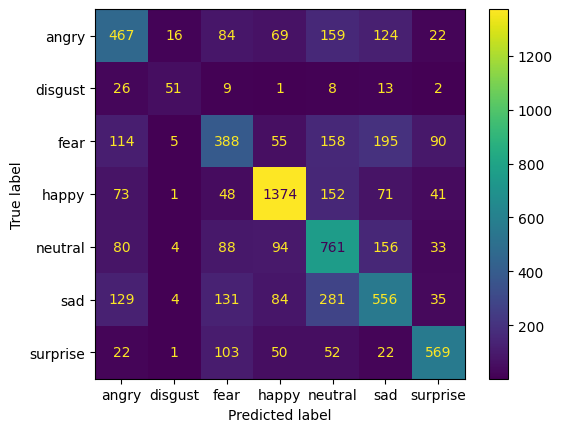

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

confusion_mtx = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mtx, display_labels = emotion_labels)
disp.plot()
plt.show()